In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log, pi, tan, radians
%matplotlib inline

mapWidth = 2058
mapHeight = 2058

def conv_lat(latitude):
    """Переводит градусы широты в радианы."""
    latRad = radians(latitude)

    mercN = log(tan((pi / 4) + (latRad / 2))) # учёт масштаба для широты в проекции Меркатора
    y = (mapHeight / 2) - (mapWidth * mercN / (2 * pi))
    return y

def conv_long(longitude):
    """Переводит градусы долготы в радианы."""
    x = (longitude + 180) * (mapWidth / 360)
    return x

In [2]:
df = pd.read_csv('cities.csv')
df = pd.DataFrame(df[df['Population'] > 1000000])
df.head()

,Latitude deg,Latitude min,Latitude sec,Longitude deg,Longitude min,Longitude sec,Population,Country,Capital,Name
0,55,45,21,37,37,4,12506468,Russia,1,Moscow
1,40,43,42,-73,-59,-39,8405837,USA,0,New York
3,34,2,0,-118,-16,0,3976322,USA,0,Los Angeles
5,-37,-49,-14,144,57,41,4529500,Australia,0,Melbourne
6,-33,-27,0,-70,-40,0,5128590,Chile,1,Santiago


In [3]:
# перевод из шестидесятиричной системы в десятичную
df.loc[:, ['Latitude min', 'Longitude min']] /= 60
df.loc[:, ['Latitude sec', 'Longitude sec']] /= 3600
df['Decimal latitude'] = df[['Latitude deg', 'Latitude min', 'Latitude sec']].sum(axis=1)
df['Decimal longitude'] = df[['Longitude deg', 'Longitude min', 'Longitude sec']].sum(axis=1)

In [4]:
df = df.loc[:, 'Population':'Decimal longitude']
df.index = range(11)
df

,Population,Country,Capital,Name,Decimal latitude,Decimal longitude
0,12506468,Russia,1,Moscow,55.755833,37.617778
1,8405837,USA,0,New York,40.728333,-73.994167
2,3976322,USA,0,Los Angeles,34.033333,-118.266667
3,4529500,Australia,0,Melbourne,-37.820556,144.961389
4,5128590,Chile,1,Santiago,-33.450000,-70.666667
5,21705000,China,1,Beijing,39.933333,116.400000
6,24152700,China,0,Shanghai,31.166667,121.466667
7,14000000,China,0,Guangzhou,23.127500,113.247222
8,6970105,Bangladesh,1,Dhaka,23.700000,90.366667
9,23500000,Pakistan,0,Karachi,24.860000,67.010000


In [5]:
# применение функции для перевода градусов в радианы
df['y'] = df['Decimal latitude'].apply(conv_lat)
df['x'] = df['Decimal longitude'].apply(conv_long)

In [7]:
# назначение цветов для стран и маркеров для столиц
df = df[['Population', 'Country', 'Capital', 'Name', 'y', 'x']]
color_dict = {'Russia': 'r', 'USA': 'b', 'Australia': '#05fcfc', 'Chile': '#d62728',
             'China': 'y', 'Bangladesh': 'm', 'Pakistan': '#654C4C', 'Brasil': '#14d91a'}
marker_dict = {'Capital': 'X', 'City': 'o'}
df['Colors'] = df['Country'].map(color_dict)
capital = df[df['Capital'].isin([1])]
other = df[df['Capital'].isin([0])]
df

,Population,Country,Capital,Name,y,x,Colors
0,12506468,Russia,1,Moscow,643.335750,1244.048296,r
1,8405837,USA,0,New York,773.651318,606.000014,b
2,3976322,USA,0,Los Angeles,821.876251,352.908889,b
3,4529500,Australia,0,Melbourne,1262.870214,1857.695940,#05fcfc
4,5128590,Chile,1,Santiago,1232.113469,625.022222,#d62728
5,21705000,China,1,Beijing,779.613169,1694.420000,y
6,24152700,China,0,Shanghai,841.332409,1723.384444,y
7,14000000,China,0,Guangzhou,893.043934,1676.396620,y
8,6970105,Bangladesh,1,Dhaka,889.477457,1545.596111,m
9,23500000,Pakistan,0,Karachi,882.202469,1412.073833,#654C4C


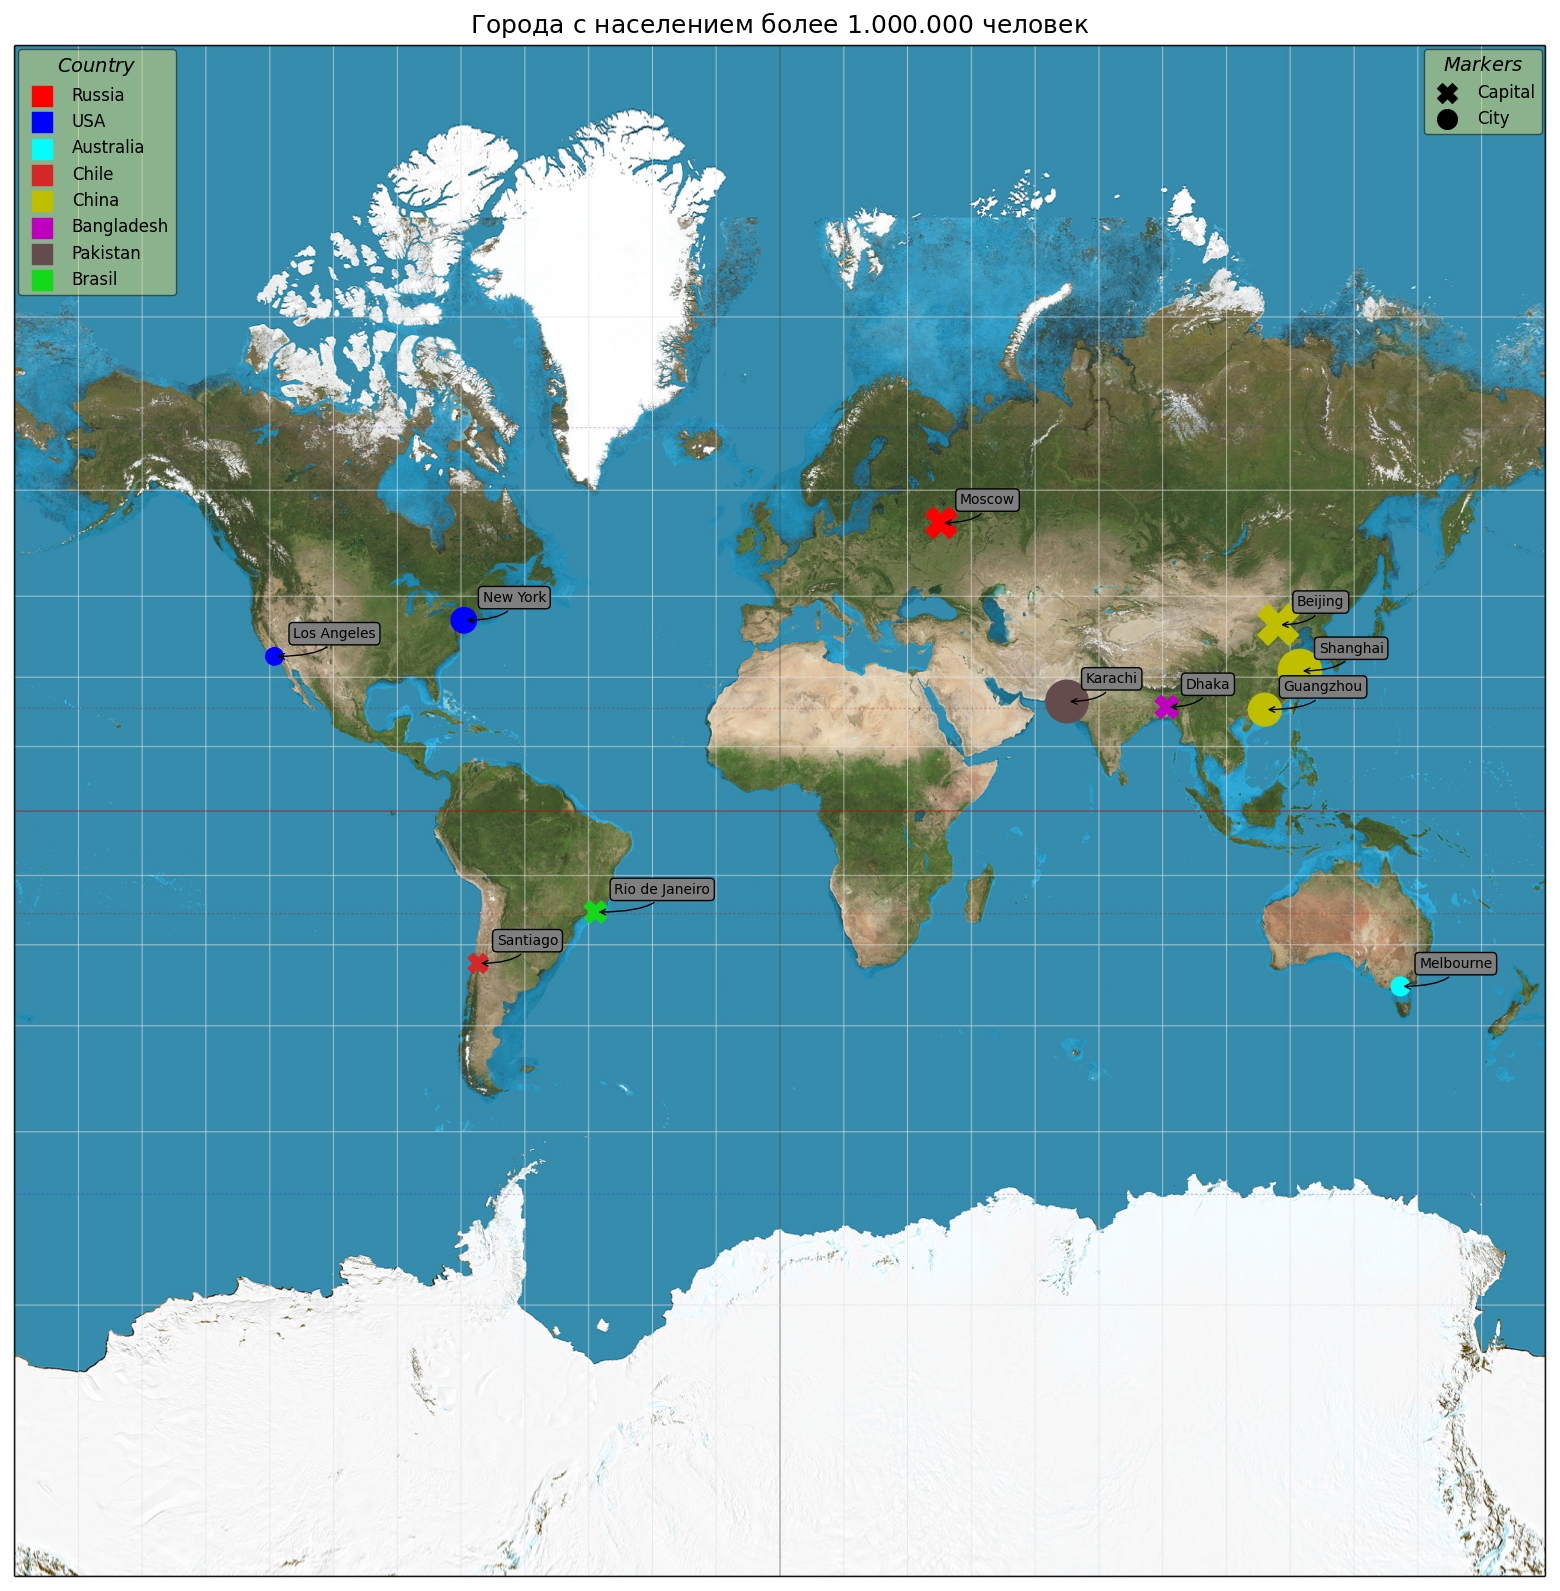

In [8]:
fig = plt.figure(figsize=(20, 20))

with open('world_1.jpg', 'rb') as world_map:
    map_img = plt.imread(world_map)

plt.imshow(map_img)
plt.axis('off')
plt.title(u'Города с населением более $1.000.000$ ' + \
            'человек', fontsize=18)

plt.scatter(capital['x'], capital['y'], s=capital['Population'].values / 25000,
            c=capital['Colors'], alpha=1, marker='X')
plt.scatter(other['x'], other['y'], s=other['Population'].values / 25000,
            c=other['Colors'], alpha=1)

for i in capital.index:
    plt.annotate(capital.loc[i]['Name'], xy=(capital.loc[i]['x'], capital.loc[i]['y']),
                xytext=(capital.loc[i]['x'] + 25, capital.loc[i]['y'] - 25),
                bbox=dict(boxstyle="round", fc="tab:gray"), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))

for i in other.index:
    plt.annotate(other.loc[i]['Name'], xy=(other.loc[i]['x'], other.loc[i]['y']),
                xytext=(other.loc[i]['x'] + 25, other.loc[i]['y'] - 25),
                bbox=dict(boxstyle="round", fc="tab:gray"), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3")) 

first = [(plt.scatter([], [], c=color_dict[country], s=200, 
                      label=country, alpha=1, marker='s')) for country in color_dict.keys()]
second = [(plt.scatter([], [], c='k', s=200, 
                       label=a, marker=marker_dict[a])) for a in marker_dict.keys()]

plt.gca().add_artist(plt.legend(handles=first, loc='upper left', fontsize=12, 
                                edgecolor='k', facecolor='#ded96c', framealpha=0.5,
                                title='$Country$', title_fontsize=14))

plt.legend(handles=second, fontsize=12, edgecolor='k', 
           facecolor='#ded96c', framealpha=0.5, title='$Markers$', title_fontsize=14)
plt.show;